In [22]:
# store start time to get execution time of entire script
import time
start_time = time.time()

In [23]:
# helper functions for displaying table data

import numpy as np
from IPython.display import display_html

# n is the number of columns to display data in
def display_side_by_side(series_obj, n):
    df = pd.DataFrame(series_obj)
    partition = int(round(len(df) / n))
    lower_bound = 0
    upper_bound = partition
    args = []
    for i in range(n):
        args.append(df[lower_bound:upper_bound])
        lower_bound += partition
        upper_bound += partition
    helper(args)

def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [24]:
INCLUDE_MURDER = True

In [25]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

if INCLUDE_MURDER:
    fname = 'data_cleaned_Illicit_Days0_grouped_with_murder.csv'
else:
    fname = 'data_cleaned_Illicit_Days0_grouped.csv'

df = pd.read_csv(fname)
df.head()

,Unnamed: 0,female,nonwhite,unemplmt,prsatx,adol,Illicit_Days0,Illicit_Cens0,checkin_flag,gvsg_-8,gvsg_-4,gvsg_0,gvsg_1,gvsg_2,CWSg_0_-8,CWSg_0_-4,CWSg_0_0,CWSg_0_1,CWSg_0_2,srprobg_0.0,srprobg_1.0,srprobg_2.0,dssg_0_-8,dssg_0_-4,dssg_0_0,dssg_0_1,dssg_0_2,epsg_0_-8,epsg_0_-4,epsg_0_0,epsg_0_1,epsg_0_2,adhdg_0_-8,adhdg_0_-4,adhdg_0_0,adhdg_0_1,adhdg_0_2,cdsg_0_-8,cdsg_0_-4,cdsg_0_0,cdsg_0_1,cdsg_0_2,cjsig_0_-8,cjsig_0_-7,cjsig_0_-4,cjsig_0_0,cjsig_0_1,cjsig_0_2,lrig_0_-8,lrig_0_-7,lrig_0_-4,lrig_0_0,lrig_0_1,lrig_0_2,srig_0_-8,srig_0_-7,srig_0_-4,srig_0_0,srig_0_1,srig_0_2,pssig_0_-8,pssig_0_-7,pssig_0_-4,pssig_0_-3,pssig_0_0,pssig_0_1,pssig_0_2,rerig_0_-8,rerig_0_-7,rerig_0_-4,rerig_0_-3,rerig_0_0,rerig_0_1,rerig_0_2,racegrps_-8,racegrps_-4,racegrps_1,racegrps_2,racegrps_3,racegrps_4,racegrps_5,racegrps_6,racegrps_7,POPIgrp_-8,POPIgrp_-7,POPIgrp_-4,POPIgrp_-3,POPIgrp_1,POPIgrp_2,POPIgrp_3,POPIgrp_4,POPIgrp_5,afssg_0_-8,afssg_0_-4,afssg_0_0,afssg_0_1,afssg_0_2,tpsg_0_-8,tpsg_0_-4,tpsg_0_-3,tpsg_0_0,tpsg_0_1,tpsg_0_2,gssig_0_-8,gssig_0_-4,gssig_0_-3,gssig_0_0,gssig_0_1,gssig_0_2,PMSg_-8,PMSg_-7,PMSg_-4,PMSg_-3,PMSg_0,PMSg_1,PMSg_2,IMSg_-8,IMSg_-7,IMSg_-4,IMSg_-3,IMSg_0,IMSg_1,IMSg_2,SESg_0_-8,SESg_0_-7,SESg_0_-4,SESg_0_0,SESg_0_1,SESg_0_2,r4ag_0_0.0,r4ag_0_1.0,r4ag_0_2.0,primsev_1.0,primsev_3.0,primsev_4.0,primsev_5.0,primsev_6.0,murder_num_grouped_0.0,murder_num_grouped_1.0,murder_num_grouped_2.0
0,2387,1,1.0,1.0,1.0,0,96,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,4287,1,1.0,1.0,0.0,0,240,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,5217,1,1.0,0.0,0.0,0,365,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,5781,1,1.0,1.0,0.0,0,351,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
4,5980,1,1.0,1.0,1.0,0,365,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0


In [26]:
df.shape

(14850, 140)

In [27]:
import matplotlib.pyplot as plt

def get_ground_truth(data):
    relapsed = data[data.Illicit_Cens0 == 0]
    counts = relapsed['Illicit_Days0'].value_counts()
    counts = counts.to_dict()
    print(counts)
    temp = [len(data)] * 365
    labels = list(range(365))
    for i in range(365):
        labels[i] += 1
    total = 0
    errors = []
    for i in range(365):
        try:
            temp[i] = temp[i] - counts[i+1] - total
            total = total + counts[i+1]
        except KeyError:
            errors.append(i)

    for ele in sorted(errors, reverse = False):
        if ele != 0:
            temp[ele] = temp[ele-1]
        else:
             temp[0] = len(data)
    temp = [x / len(data) for x in temp]
    return labels, temp

{365: 2543, 364: 234, 182: 176, 363: 151, 196: 151, 357: 150, 350: 147, 358: 147, 356: 133, 168: 126, 175: 123, 359: 120, 351: 119, 181: 116, 184: 111, 189: 109, 183: 107, 195: 103, 360: 102, 352: 101, 361: 96, 355: 95, 178: 94, 169: 92, 353: 89, 362: 88, 177: 85, 176: 83, 188: 82, 354: 82, 91: 82, 105: 78, 187: 74, 174: 74, 92: 74, 190: 73, 84: 69, 180: 68, 170: 66, 172: 63, 185: 61, 173: 60, 191: 60, 179: 56, 171: 56, 89: 56, 194: 53, 193: 53, 78: 52, 98: 52, 161: 49, 186: 48, 85: 46, 104: 45, 197: 44, 90: 43, 77: 43, 83: 43, 99: 42, 86: 42, 192: 40, 167: 40, 95: 39, 242: 38, 162: 38, 97: 38, 103: 37, 82: 36, 160: 35, 100: 33, 106: 33, 203: 33, 154: 33, 163: 31, 211: 31, 166: 31, 153: 30, 205: 29, 96: 29, 93: 29, 94: 28, 79: 28, 202: 27, 87: 27, 199: 27, 112: 27, 349: 25, 198: 25, 159: 25, 88: 24, 201: 24, 209: 24, 158: 24, 165: 24, 164: 23, 156: 23, 210: 22, 230: 22, 204: 21, 101: 21, 107: 21, 102: 21, 217: 21, 213: 21, 346: 21, 348: 20, 200: 20, 240: 20, 155: 20, 80: 19, 241: 19, 3

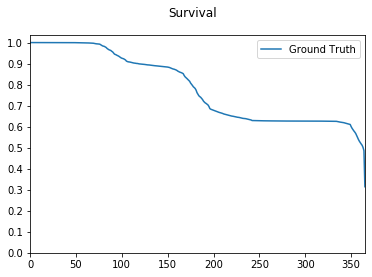

In [28]:
# display ground truth survival plot
plt.suptitle('Survival')
labels, temp = get_ground_truth(df[['Illicit_Cens0','Illicit_Days0']])
plt.plot(labels, temp, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.savefig('GROUND_TRUTH_SURVIVAL.png')
plt.show()

In [29]:
# drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(14850, 139)

Full Population Survival Analysis

In [30]:
from sklearn.model_selection import train_test_split
from sksurv.util import Surv

predictor_var = 'Illicit_Days0'
censoring_var = 'Illicit_Cens0'

y = df[[censoring_var, predictor_var]]
df.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(11880, 137) (11880,)
(2970, 137) (2970,)


In [31]:
%%time
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

CPU times: user 3min 59s, sys: 1.49 s, total: 4min 1s
Wall time: 4min 35s


GradientBoostingSurvivalAnalysis(criterion='friedman_mse', dropout_rate=0.0,
                                 learning_rate=0.1, loss='coxph', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=None,
                                 subsample=1.0, verbose=0)

In [32]:
%%time
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

CPU times: user 11 s, sys: 869 ms, total: 11.9 s
Wall time: 13.9 s


RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [33]:
%%time
from sksurv.linear_model import CoxnetSurvivalAnalysis

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

CPU times: user 4.08 s, sys: 47 ms, total: 4.12 s
Wall time: 4.43 s


CoxnetSurvivalAnalysis(alpha_min_ratio=0.0001, alphas=None, copy_X=True,
                       fit_baseline_model=True, l1_ratio=1, max_iter=100000,
                       n_alphas=100, normalize=False, penalty_factor=None,
                       tol=1e-07, verbose=False)

In [34]:
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
               'Score': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                        rcr.score(X_test, y_test_censored)]}
concordance = pd.DataFrame(data=scores)
concordance

,Model,Score
0,Random Forest Boosted,0.660219
1,Random Forest,0.695723
2,Lasso,0.659494


In [35]:
# display feature importance for gbsa
feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Importance':gbsa.feature_importances_,})
feature_importance.sort_values(by=['Importance'], ascending=False, inplace=True)
display_side_by_side(feature_importance, 4)

,Feature,Importance
75,racegrps_3,0.207560
18,srprobg_2.0,0.200587
16,srprobg_0.0,0.107139
126,r4ag_0_0.0,0.075666
132,primsev_5.0,0.066780
26,epsg_0_0,0.037711
135,murder_num_grouped_1.0,0.023383
4,adol,0.020879
96,tpsg_0_-3,0.020303
36,cdsg_0_0,0.020269


In [36]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

{365: 531, 364: 49, 182: 36, 357: 36, 358: 29, 350: 28, 196: 28, 189: 25, 181: 25, 183: 24, 168: 23, 178: 23, 355: 23, 184: 22, 360: 22, 351: 22, 356: 22, 352: 21, 195: 21, 359: 21, 190: 20, 354: 20, 175: 20, 362: 20, 176: 19, 187: 17, 169: 17, 105: 17, 361: 17, 353: 16, 174: 16, 177: 16, 179: 15, 188: 15, 180: 15, 91: 14, 84: 14, 363: 13, 191: 13, 98: 13, 173: 13, 78: 13, 92: 13, 112: 12, 171: 12, 170: 12, 99: 12, 162: 12, 185: 11, 194: 11, 90: 10, 89: 10, 97: 10, 349: 10, 211: 9, 161: 9, 172: 9, 242: 9, 103: 8, 95: 8, 107: 8, 77: 8, 100: 8, 86: 8, 199: 7, 93: 7, 240: 7, 88: 7, 158: 7, 166: 7, 193: 7, 104: 7, 198: 7, 85: 7, 167: 7, 79: 7, 202: 7, 214: 6, 230: 6, 186: 6, 348: 6, 192: 6, 213: 6, 153: 6, 96: 6, 110: 5, 210: 5, 209: 5, 165: 5, 164: 5, 119: 5, 241: 5, 200: 5, 205: 5, 197: 5, 160: 5, 83: 5, 82: 5, 225: 5, 203: 5, 154: 5, 339: 4, 159: 4, 145: 4, 156: 4, 101: 4, 236: 4, 111: 4, 217: 4, 237: 4, 87: 4, 336: 4, 138: 4, 226: 4, 224: 4, 238: 4, 222: 4, 219: 4, 218: 4, 201: 4, 80: 

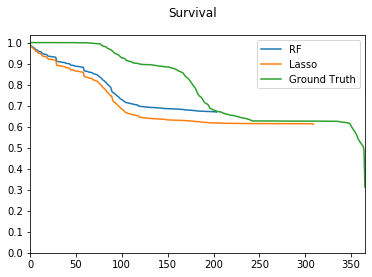

In [37]:
# display survival plot
plt.suptitle('Survival')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels, temp = get_ground_truth(y_test)
plt.plot(labels, temp, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
if INCLUDE_MURDER:
    fname = 'survival_grouped_with_murder.png'
else:
    fname = 'survival_grouped.png'
plt.savefig(fname)
plt.show()

In [38]:
pred_haz_rsf = rsf.predict_cumulative_hazard_function(X_test)
pred_haz_rcr = rcr.predict_cumulative_hazard_function(X_test)

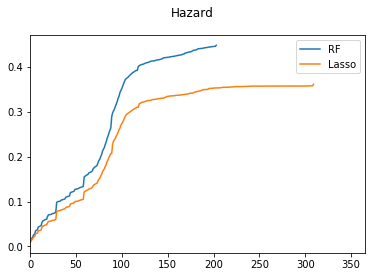

In [39]:
# display hazard plot
plt.suptitle('Hazard')
plt.plot(np.mean([person for person in pred_haz_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_haz_rcr], axis=0), label='Lasso')
plt.legend()
plt.xlim(0, 365)
plt.show()

In [40]:
temp = feature_importance.nlargest(10,['Importance'])
display_side_by_side(temp, 1)

,Feature,Importance
75,racegrps_3,0.207560
18,srprobg_2.0,0.200587
16,srprobg_0.0,0.107139
126,r4ag_0_0.0,0.075666
132,primsev_5.0,0.066780
26,epsg_0_0,0.037711
135,murder_num_grouped_1.0,0.023383
4,adol,0.020879
96,tpsg_0_-3,0.020303
36,cdsg_0_0,0.020269


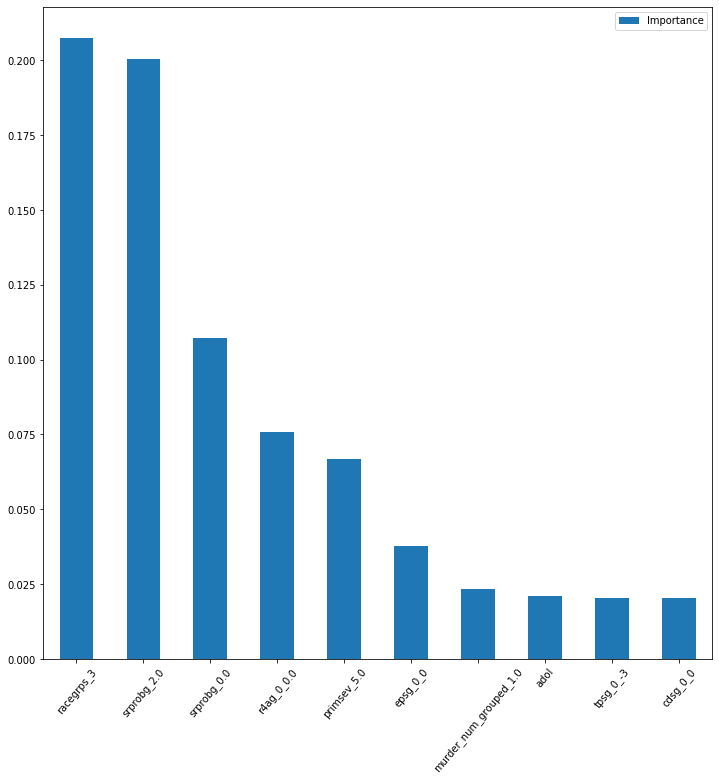

In [43]:
df = pd.DataFrame({'Importance': temp['Importance'].tolist()},
                  index=temp['Feature'].tolist())
df.sort_values(by=['Importance'], ascending=False, inplace=True)
ax = df.plot.bar(rot=50, figsize=(12, 12))
fig = ax.get_figure()
if INCLUDE_MURDER:
    fname = 'feature_importances_grouped_with_murder.png'
else:
    fname = 'feature_importances_grouped.png'
fig.savefig(fname)

In [42]:
# print out total notebook execution time
total_seconds = int(time.time() - start_time)
minutes = total_seconds // 60
seconds = total_seconds % 60
print("--- " + str(minutes) + " minutes " + str(seconds) + " seconds ---")

--- 5 minutes 0 seconds ---
